# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. ABDUL AZIS AL AYUBBI - 1301213493
2. FATHAN ASKAR - 1301213374
3. DHAFINDRA RAZAQA STEFANO - 1301213115

# Latar Belakang
Latar belakang laporan ini dibuat adalah untuk memenuhi tugas besar mata kuliah Pembelajaran Mesin. Pada laporan ini, kami diharuskan menjelaskan, mendesain, dan mengimplementasikan algoritma supervised learning yang telah dipelajari selama kuliah. Dengan didasari oleh dataset yang telah kami pilih, yaitu Steel
Industry Energy Consumption. Dataset tersebut diambil dari DAEWOO Steel Co. Ltd in Gwangyang, South Korea, yang memproduksi beberapa jenis plat baja, plat besi dan kumparan. Dataset ini memiliki informasi konsumsi listrik yang disimpan dalam sistem berbasis cloud. Informasi tersebut merupakan data harian, bulanan, dan tahunan pemakaian.

Terdapat lima algoritma supervised learning yang tersedia, yaitu Support Vector Machine (SVM), Artificial Neural Network (ANN), Recurrent Neural Network (RNN), Long Short Term Memory (LSTM), dan Convoluted Neural Network (CNN). Setelah berdiskusi dan mempelajari setiap algoritma supervised learning yang tersedia, kelompok kami memutuskan untuk memakai algoritma Artificial Neural Network atau ANN. Alasan kami memilih algoritma tersebut adalah dikarenakan cocok dengan kebutuhan untuk menganalisis data konsumsi energi yang kompleks dan beragam yang ada dalam dataset. ANN memiliki kemampuan untuk mempelajari pola dari data yang kompleks, ANN cocok untuk memahami dan meramalkan pola konsumsi energi industri setiap hari, bulanan dan tahunan. Salah satu alasan utama pilihan kami adalah kemampuan ANN untuk menyesuaikan diri dengan struktur data yang kompleks, seperti pola konsumsi energi dalam konteks produksi industri, karena dataset tersebut memiliki informasi multi-tahunan dan multivariate yang membutuhkan pemahaman mendalam tentang hubungan antarvariabelnya. Oleh karena itu, kemampuan adaptasi ANN yang membuat kami memilih ANN.

#### Exploration Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import keras.models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def read_excel(path, sheet_target): # read excel data
    data = pd.read_excel(path, sheet_name=sheet_target)
    return pd.DataFrame(data)

In [ ]:
dwn_url = 'https://drive.google.com/uc?export=download&id=1As07T3hQ4vR4VPKmpf7aDS4yuR4lMLnr'
data = read_excel(dwn_url,sheet_target="Steel_industry_data")

In [ ]:
data.head()
#melihat 5 baris pertama dataset

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
data.info()
#memperlihatkan ada berapa banyak kolom, apa saja nama kolom tersebut, jumlah
#data Non-Null pada setiap kolom, dan juga tipe data dari tiap kolom.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10

In [ ]:
data.describe()
#untuk melihat banyak data, rata-rata, standar deviasi, nilai minimum, nilai maksimum, quartil 1, quartil 2 dan quartil 3 dari setiap kolom

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [ ]:
correlation_matrix = data.corr()
correlation_with_usage = correlation_matrix['Usage_kWh'].abs()
#Melihat korelasi kolom-kolom pada dataset Steel Industry Energy Consumption dengan kolom ‘Usage_kWh’
sorted_correlations = correlation_with_usage.sort_values(ascending=False)
#hasil korelasi diurutkan dari hasil yang tertinggi hingga hasil yang terendah.
print(sorted_correlations)

Usage_kWh                               1.000000
CO2(tCO2)                               0.988180
Lagging_Current_Reactive.Power_kVarh    0.896150
Lagging_Current_Power_Factor            0.385960
Leading_Current_Power_Factor            0.353566
Leading_Current_Reactive_Power_kVarh    0.324922
NSM                                     0.234610
Name: Usage_kWh, dtype: float64


<ipython-input-7-649bc3b2b1ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


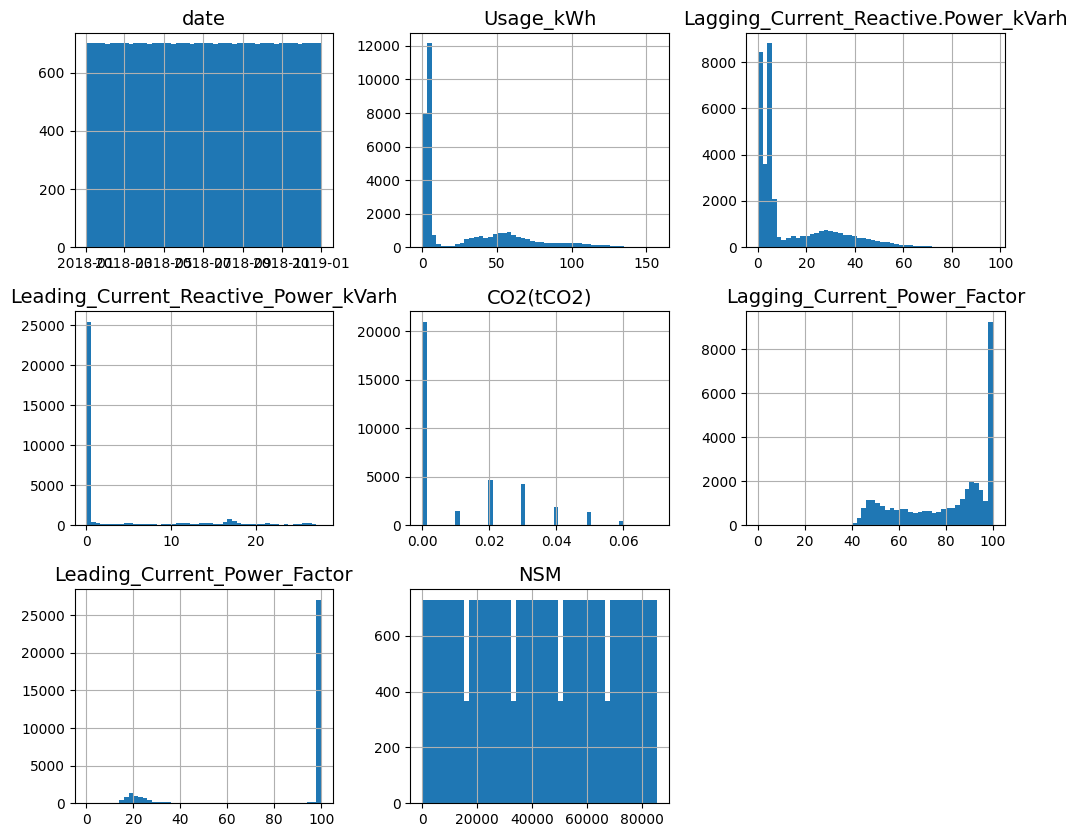

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
#untuk membuat plottingan lebih rapi

data.hist(bins=50, figsize=(12, 10))
plt.show()
#plotting untuk memberi gambaran isi tiap kolom

#### Data Pre-Processing

In [ ]:
dropColumns = ['WeekStatus','Day_of_week','Load_Type','date']
data.drop(columns=dropColumns, inplace=True)
data.head()
#penghilangan kolom dengan tipe data selain integer atau float
#yaitu date, weekStatus, Day_of_week, dan Load_Type.

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,3.17,2.95,0.0,0.0,73.21,100.0,900
1,4.00,4.46,0.0,0.0,66.77,100.0,1800
2,3.24,3.28,0.0,0.0,70.28,100.0,2700
3,3.31,3.56,0.0,0.0,68.09,100.0,3600
4,3.82,4.50,0.0,0.0,64.72,100.0,4500


In [ ]:
data['lagAndLead_Current_Reactive.Power_kVarh'] = data['Lagging_Current_Reactive.Power_kVarh'] + data['Leading_Current_Reactive_Power_kVarh']
data['lagAndLead_Current_Power_factor'] = data['Lagging_Current_Power_Factor'] + data['Leading_Current_Power_Factor']
#Melakukan penggabungan 2 kolom menjadi satu
#ini dilakukan untuk mencari kolom dengan korelasi yang baik

In [ ]:
data['NSM'] = data['NSM'].astype(float)
#Mengubah NSM menjadi float dari integer
#karena kolom-kolom lain memiliki tipe data float.
print(data.dtypes)

Usage_kWh                                  float64
Lagging_Current_Reactive.Power_kVarh       float64
Leading_Current_Reactive_Power_kVarh       float64
CO2(tCO2)                                  float64
Lagging_Current_Power_Factor               float64
Leading_Current_Power_Factor               float64
NSM                                        float64
lagAndLead_Current_Reactive.Power_kVarh    float64
lagAndLead_Current_Power_factor            float64
dtype: object


In [ ]:
# #Menghilangkan outlier
# def remove_outliers(data, column):
#     Q1 = data[column].quantile(0.25)
#     Q3 = data[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
#     #dengan cara menghilangkan data yang nilainya lebih rendah dari lower bound dan
#     #data yang nilainya lebih besar dari upper bound
#     return data_filtered
# for column in data.columns:
#   data = remove_outliers(data,column)

In [ ]:
data.head()
#melihat 5 baris pertama dari dataset yang sudah diproses

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,lagAndLead_Current_Reactive.Power_kVarh,lagAndLead_Current_Power_factor
0,3.17,2.95,0.0,0.0,73.21,100.0,900.0,2.95,173.21
1,4.00,4.46,0.0,0.0,66.77,100.0,1800.0,4.46,166.77
2,3.24,3.28,0.0,0.0,70.28,100.0,2700.0,3.28,170.28
3,3.31,3.56,0.0,0.0,68.09,100.0,3600.0,3.56,168.09
4,3.82,4.50,0.0,0.0,64.72,100.0,4500.0,4.50,164.72


In [ ]:
correlation_matrix = data.corr()
correlation_with_usage = correlation_matrix['Usage_kWh'].abs()
#Melihat korelasi kolom-kolom pada dataset Steel Industry Energy Consumption yang sudah diproses dengan kolom ‘Usage_kWh’
sorted_correlations = correlation_with_usage.sort_values(ascending=False)
#hasil korelasi diurutkan dari hasil yang tertinggi hingga hasil yang terendah.
print(sorted_correlations)

Usage_kWh                                  1.000000
CO2(tCO2)                                  0.988180
Lagging_Current_Reactive.Power_kVarh       0.896150
lagAndLead_Current_Reactive.Power_kVarh    0.817149
lagAndLead_Current_Power_factor            0.689800
Lagging_Current_Power_Factor               0.385960
Leading_Current_Power_Factor               0.353566
Leading_Current_Reactive_Power_kVarh       0.324922
NSM                                        0.234610
Name: Usage_kWh, dtype: float64


In [ ]:
data.info()
#untuk melihat berapa baris yang tersisa setelah dataset diproses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Usage_kWh                                35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh     35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh     35040 non-null  float64
 3   CO2(tCO2)                                35040 non-null  float64
 4   Lagging_Current_Power_Factor             35040 non-null  float64
 5   Leading_Current_Power_Factor             35040 non-null  float64
 6   NSM                                      35040 non-null  float64
 7   lagAndLead_Current_Reactive.Power_kVarh  35040 non-null  float64
 8   lagAndLead_Current_Power_factor          35040 non-null  float64
dtypes: float64(9)
memory usage: 2.4 MB


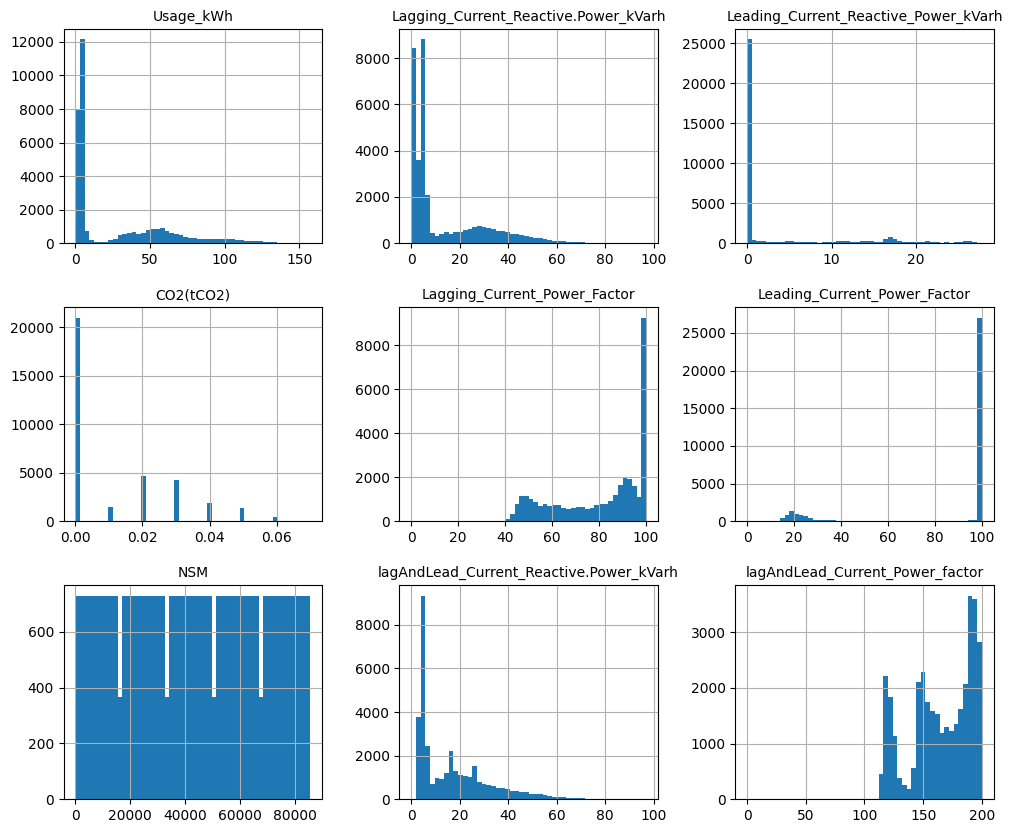

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 10))
plt.show()
#plotting untuk membandiingkan dengan plottingan sebelumnya

# Ringkasan Metode
Berikut adalah Ringkasan Metode Learning algoritma kami

#### 1. Persiapan Data

In [ ]:
X = data.drop('Usage_kWh',axis=1)
#berisikan kolom-kolom dari dataset kecuali kolom Usage_kWh untuk dijadikan data yang independen untuk dilakukan regressi untuk memprediksi Usage_kWh

y = data['Usage_kWh']
#berisikan kolom Usage_kWh yang merupakan data yang dependen

#### 2. Pembagian Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 20)
#data dibagi menjadi X_train, X_test, y_train dan y_test
#proposi pengujian adalah 20%, berarti 20% data masuk ke test, 80% ke train

#### 3. Normailisasi Data

In [ ]:
#Import library StandardScaler untuk normalisasi data
from sklearn.preprocessing import StandardScaler

#Inisiasi objek StandardScaler
scaler=StandardScaler()

#Melatih scaler pada data X_train
scaler.fit(X_train)

#Mengubah X_train dan X_test menggunakan scaler sebelumnya
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model-Model Learning
Berikut adalah Model-Model yang kami gunakan untuk training

#### Model 1 Baseline Model

In [ ]:
#baseline model
model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu')) #Menambah input layer dengan 128 neuron dengan 8 x data (input)
model.add(Dense(64, activation='relu'))#Menambah hidden layer dengan 64 neuron
model.add(Dense(1, activation='linear')) #Menambah 1 Output layer

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) #Mengcompile model dengan MSE dengan optimizer adam dan metrics mae
model.summary() #Kesimpulan dari model yang akan dijalankan


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9473 (37.00 KB)
Trainable params: 9473 (37.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model pertama ini adalah baseline model. Terdapat layer input, hidden dan output. Pada input layer terdapat 128 neuron, di hidden layer terdapat 64 neuron, dan output layer hanya memiliki 1 neuron. Fungsi aktivasi di model ini adalah reLU untuk input dan hidden, dan juga linear untuk output layer.

Model ini digunakan untuk membandingkan perbedaan akurasi dari model-model selanjutnya yang memiliki jumlah neuron yang berbeda, atau fungsi aktivasi yang berbeda.

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs =100)
#Data training and validation loss dan mae saat dijalankan 100 epoch dengan melakukan fitting

Epoch 1/100
701/701 [==============================] - 4s 3ms/step - loss: 166.9055 - mae: 4.5826 - val_loss: 10.4888 - val_mae: 1.8408
Epoch 2/100
701/701 [==============================] - 2s 3ms/step - loss: 8.6715 - mae: 1.5717 - val_loss: 6.9240 - val_mae: 1.4546
Epoch 3/100
701/701 [==============================] - 2s 2ms/step - loss: 5.4188 - mae: 1.2201 - val_loss: 4.1360 - val_mae: 1.0540
Epoch 4/100
701/701 [==============================] - 2s 2ms/step - loss: 3.8089 - mae: 1.0178 - val_loss: 3.4444 - val_mae: 0.9941
Epoch 5/100
701/701 [==============================] - 2s 2ms/step - loss: 3.0724 - mae: 0.9028 - val_loss: 2.5426 - val_mae: 0.7860
Epoch 6/100
701/701 [==============================] - 2s 3ms/step - loss: 2.5696 - mae: 0.8061 - val_loss: 2.3119 - val_mae: 0.8053
Epoch 7/100
701/701 [==============================] - 2s 3ms/step - loss: 2.2960 - mae: 0.7617 - val_loss: 2.1206 - val_mae: 0.7494
Epoch 8/100
701/701 [==============================] - 3s 4ms/step

#### Model Exploration (3 Model, Model 2-4)
#### Model 2

In [ ]:
#Model ke-2 mengeksplor jika neuron yang digunakan pada input,hidden dan output layer dikurangkan secara signifikan
model2 = Sequential()
model2.add(Dense(2, input_dim=8, activation='relu'))
model2.add(Dense(1, activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 23 (92.00 Byte)
Trainable params: 23 (92.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model 2 adalah test model pertama, memiliki 3 layer yaitu input, hidden, dan output. Pada input layer terdapat 2 neuron, di hidden layer hanya terdapat 1 neuron, dan output layer juga memiliki 1 neuron. Fungsi aktivasi di model ini adalah reLU untuk input dan hidden, dan juga linear untuk output layer.

In [ ]:
history2 = model2.fit(X_train, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
701/701 [==============================] - 2s 2ms/step - loss: 1013.3774 - mae: 19.0656 - val_loss: 163.1139 - val_mae: 7.7453
Epoch 2/100
701/701 [==============================] - 2s 2ms/step - loss: 46.3263 - mae: 3.8141 - val_loss: 24.4018 - val_mae: 3.0253
Epoch 3/100
701/701 [==============================] - 2s 3ms/step - loss: 23.5989 - mae: 2.8963 - val_loss: 20.8533 - val_mae: 2.7229
Epoch 4/100
701/701 [==============================] - 2s 3ms/step - loss: 20.3133 - mae: 2.6201 - val_loss: 18.0906 - val_mae: 2.4876
Epoch 5/100
701/701 [==============================] - 2s 3ms/step - loss: 17.8215 - mae: 2.3993 - val_loss: 15.9270 - val_mae: 2.3139
Epoch 6/100
701/701 [==============================] - 2s 2ms/step - loss: 15.9907 - mae: 2.2379 - val_loss: 14.4916 - val_mae: 2.1874
Epoch 7/100
701/701 [==============================] - 2s 2ms/step - loss: 14.8908 - mae: 2.1485 - val_loss: 13.7973 - val_mae: 2.1322
Epoch 8/100
701/701 [==============================

#### Model 3

In [ ]:
#Model ke-3 mengeksplor jika kita menggunakan fungsi aktivasi sigmoid dibandingkan dengan relU pada input dan hidden layer
model3 = Sequential()
model3.add(Dense(128, input_dim=8, activation='sigmoid'))
model3.add(Dense(64, activation='sigmoid'))
model3.add(Dense(1, activation='linear'))

model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1152      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9473 (37.00 KB)
Trainable params: 9473 (37.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model 3 adalah test model kedua, memiliki 3 layer yaitu input, hidden, dan output. Pada input layer terdapat 128 neuron, di hidden layer terdapat 64 neuron, dan output layer hanya memiliki 1 neuron. Fungsi aktivasi di model ini adalah sigmoid untuk input dan hidden, dan juga linear untuk output layer.

In [ ]:
history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
701/701 [==============================] - 4s 4ms/step - loss: 1200.8563 - mae: 21.6360 - val_loss: 764.3611 - val_mae: 15.0150
Epoch 2/100
701/701 [==============================] - 2s 2ms/step - loss: 559.7607 - mae: 11.7953 - val_loss: 375.4730 - val_mae: 8.9257
Epoch 3/100
701/701 [==============================] - 2s 2ms/step - loss: 296.1654 - mae: 7.5447 - val_loss: 209.4980 - val_mae: 5.8836
Epoch 4/100
701/701 [==============================] - 2s 2ms/step - loss: 170.3356 - mae: 5.2325 - val_loss: 126.8134 - val_mae: 4.4998
Epoch 5/100
701/701 [==============================] - 2s 2ms/step - loss: 103.4022 - mae: 4.0276 - val_loss: 75.5059 - val_mae: 3.3506
Epoch 6/100
701/701 [==============================] - 2s 2ms/step - loss: 60.5235 - mae: 2.9883 - val_loss: 44.4495 - val_mae: 2.5804
Epoch 7/100
701/701 [==============================] - 2s 3ms/step - loss: 36.5987 - mae: 2.3842 - val_loss: 28.0718 - val_mae: 2.1438
Epoch 8/100
701/701 [=====================

#### Model 4

In [ ]:
#Model ke-4 mengeksplor jika kita menambahkan neuron pada input dan hidden layer
model4 = Sequential()
model4.add(Dense(512, input_dim=8, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(1, activation='linear'))

model4.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               4608      
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 136193 (532.00 KB)
Trainable params: 136193 (532.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model 4 adalah test model terakhir, memiliki 3 layer yaitu input, hidden, dan output. Pada input layer terdapat 512 neuron, di hidden layer terdapat 216 neuron, dan output layer hanya memiliki 1 neuron. Fungsi aktivasi di model ini adalah reLU untuk input dan hidden, dan juga linear untuk output layer.

In [ ]:
history4 = model4.fit(X_train, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
701/701 [==============================] - 6s 7ms/step - loss: 77.0098 - mae: 3.0526 - val_loss: 6.9247 - val_mae: 1.4807
Epoch 2/100
701/701 [==============================] - 3s 5ms/step - loss: 5.7477 - mae: 1.3151 - val_loss: 3.6824 - val_mae: 1.0401
Epoch 3/100
701/701 [==============================] - 3s 4ms/step - loss: 3.6161 - mae: 1.0182 - val_loss: 2.9735 - val_mae: 0.9030
Epoch 4/100
701/701 [==============================] - 4s 6ms/step - loss: 2.8846 - mae: 0.8735 - val_loss: 2.1926 - val_mae: 0.6910
Epoch 5/100
701/701 [==============================] - 4s 6ms/step - loss: 2.4099 - mae: 0.7779 - val_loss: 2.0060 - val_mae: 0.7002
Epoch 6/100
701/701 [==============================] - 3s 4ms/step - loss: 2.3210 - mae: 0.7700 - val_loss: 1.7715 - val_mae: 0.6771
Epoch 7/100
701/701 [==============================] - 3s 4ms/step - loss: 2.0080 - mae: 0.6998 - val_loss: 1.5007 - val_mae: 0.5674
Epoch 8/100
701/701 [==============================] - 5s 7ms/step -



# Hasil dan Analisis


Model 1

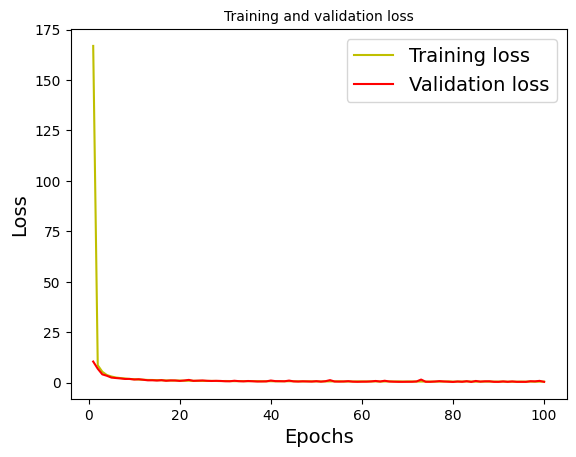

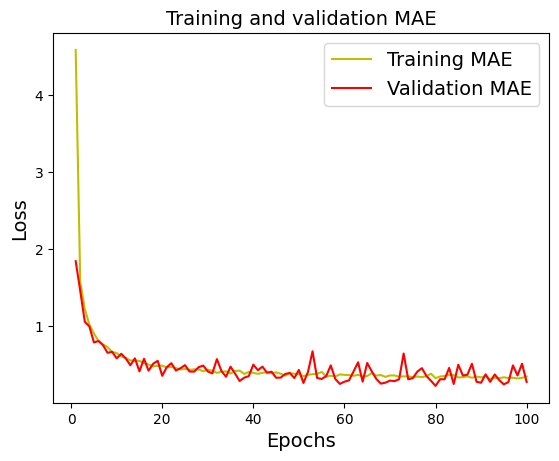

In [ ]:
#Codingan untuk memperlihatkan graph History
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.legend()
plt.show()

Dapat dilihat dari graf diatas bahwa performa model terus membaik seiring bertambahnya epoch, dan model ini telah mengalami *Convergence,* dimana model telah belajar sebanyak mungkin dari data training dan telah mencapai performa terbaik.




In [ ]:
#Hasil Prediksi dari model
predictions1 = model.predict(X_test)
print("Predicted values are: \n", predictions1[:5])
print("Real values are: \n", y_test[:5])
N  = range(len(X_test[:100]))


219/219 [==============================] - 1s 4ms/step
Predicted values are: 
 [[ 3.2924798]
 [ 3.5377936]
 [34.98963  ]
 [ 3.5335937]
 [ 3.067591 ]]
Real values are: 
 29401     3.24
31099     3.64
20097    34.70
32182     3.46
16525     3.02
Name: Usage_kWh, dtype: float64


Dapat dilihat dengan inputan yang sama, hasil prediksi dengan nilai sebenarnya tidak memiliki perbedaan nilai yang signifikan

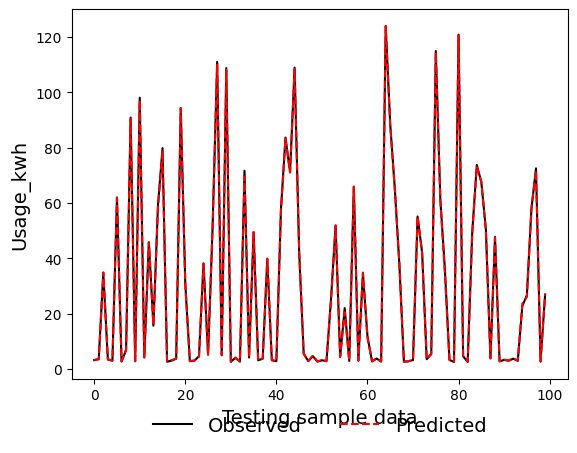

In [ ]:
plt.plot(N,y_test[:100],label='Observed',color='k',linestyle='-')
plt.plot(N,predictions1[:100],label='Predicted',color='r',linestyle='--')
plt.ylabel('Usage_kwh')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc = 'lower center', ncol = 2, frameon = False)

Dapat dilihat bahwa model baseline ini dapat memprediksi secara akurat seluruh sampel data testing

In [ ]:
#MSE dan MAE pada ANN
y_pred_ann1 = model.predict(X_test)
mse_ann, mae_ann = model.evaluate(X_test, y_test)
r2_ann = r2_score(y_test, y_pred_ann1)
print('Mean squared error: ', mse_ann)
print('Mean absolute error: ', mae_ann)
print("ANN R-squared Score:", r2_ann)

219/219 [==============================] - 0s 2ms/step - loss: 0.4118 - mae: 0.2674
Mean squared error:  0.41180241107940674
Mean absolute error:  0.2673567533493042
ANN R-squared Score: 0.9996410067499817


Mean Squared Error (MSE) adalah rata-rata kuadrat dari error. Makin besar nilainya, semakin besar errornya. Error disini artinya perbedaan antara nilai sesungguhnya dengan nilai prediksi.

Mean Absolute Error (MAE) adalah varian rata-rata antara nilai-nilai signifikan di dalam dataset dan nilai-nilai yang diprediksi. Varians disini artinya seberapa jauh nilai yang sebenarnya dengan rata-rata nilai yang diprediksi. Semakin kecil MAE, semakin baik model ini memprediksi nilai.

R2 Score adalah total varians yang diprediksi model / total varians. R2 Score berada diantara 0-100%, sehingga apabila nilainya 100%, berarti model regresi yang dibuat itu valid.

Dapat dilihat bahwa hasil MSE, MAE, dan R2 dari model baseline ANN ini sangat baik.

Model 2

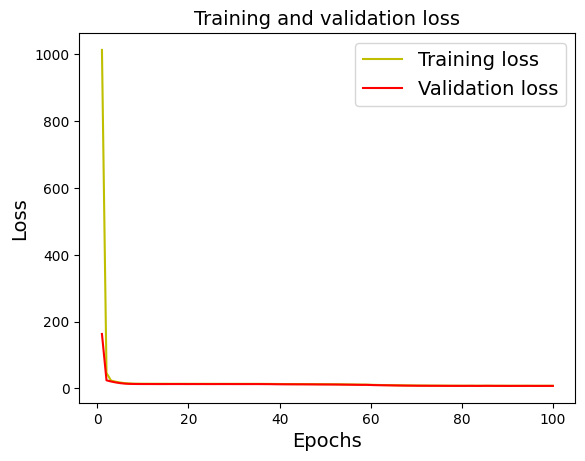

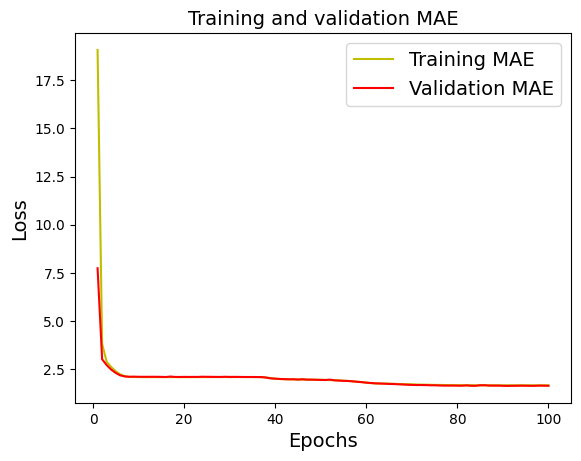

In [ ]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history2.history['mae']
val_acc = history2.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Dapat dilihat dari graf diatas bahwa performa model terus membaik seiring bertambahnya epoch, walaupun begitu loss paling rendah yang dicapai oleh model ini sangat tinggi. Namun, model ini telah mengalami *Convergence,* dimana model telah belajar sebanyak mungkin dari data training dan telah mencapai performa terbaik.


In [ ]:
#Predict on test data
predictions2 = model2.predict(X_test)
print("Predicted values are: ", predictions2[:5])
print("Real values are: ", y_test[:5])


219/219 [==============================] - 0s 2ms/step
Predicted values are:  [[ 3.5572507]
 [ 3.5572507]
 [30.670189 ]
 [ 3.5572507]
 [ 3.5572507]]
Real values are:  29401     3.24
31099     3.64
20097    34.70
32182     3.46
16525     3.02
Name: Usage_kWh, dtype: float64


Dapat dilihat dengan inputan yang sama, hasil prediksi dengan nilai sebenarnya  memiliki perbedaan nilai yang signifikan. Ini dikarenakan jumlah neuron pada model ini yang sangat kecil mengakibatkan nilai prediksi yang buruk.


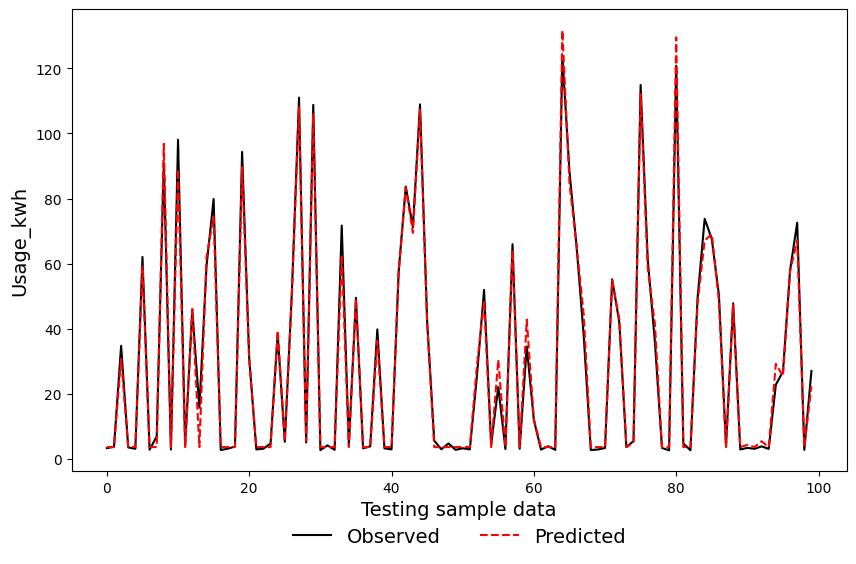

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
N  = range(len(X_test[:100]))
plt.plot(N,y_test[:100],label='Observed',color='k',linestyle='-')
plt.plot(N,predictions2[:100],label='Predicted',color='r',linestyle='--')
plt.ylabel('Usage_kwh')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc = 'lower center', ncol = 2, frameon = False)

Dapat dilihat bahwa model testing pertama ini tidak dapat memprediksi sampel data

In [ ]:
y_pred_ann2 = model2.predict(X_test)
mse_ann, mae_ann = model2.evaluate(X_test, y_test)
r2_ann = r2_score(y_test, y_pred_ann2)
print('Mean squared error from neural net: ', mse_ann)
print('Mean absolute error from neural net: ', mae_ann)
print("ANN R-squared Score:", r2_ann)

219/219 [==============================] - 0s 2ms/step - loss: 7.9184 - mae: 1.6678
Mean squared error from neural net:  7.918374061584473
Mean absolute error from neural net:  1.6678061485290527
ANN R-squared Score: 0.9930970700819952


Dapat dilihat bahwa hasil MSE, MAE, dan R2 dari model test pertama ANN ini sangat buruk, yang diakibatkan oleh jumlah neuron pada input dan hidden layer yang sangat kecil. Karena jumlah neuron yang sangat kecil, nilai-nilai yang diinput hampir tidak berubah.

Model 3

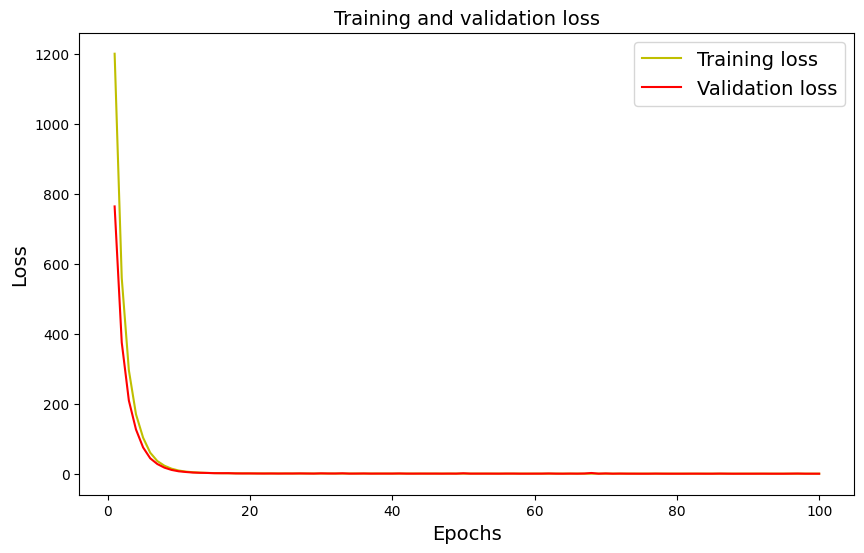

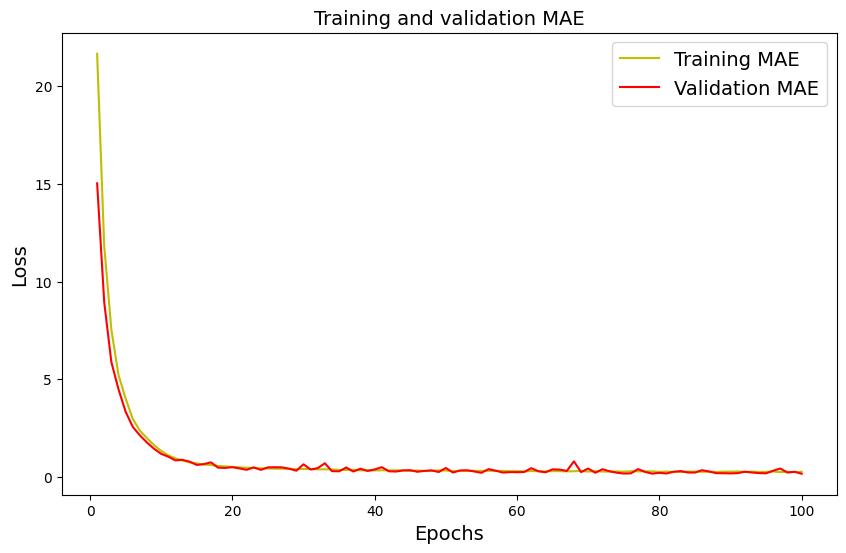

In [ ]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history3.history['mae']
val_acc = history3.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Dapat dilihat dari graf diatas bahwa performa model terus membaik seiring bertambahnya epoch, dan model ini telah mengalami Convergence, dimana model telah belajar sebanyak mungkin dari data training dan telah mencapai performa terbaik.

In [ ]:
#Predict on test data
predictions3 = model3.predict(X_test)
print("Predicted values are: ", predictions3[:5])
print("Real values are: ", y_test[:5])


219/219 [==============================] - 0s 2ms/step
Predicted values are:  [[ 3.2389805]
 [ 3.6264832]
 [34.8494   ]
 [ 3.5192575]
 [ 3.015257 ]]
Real values are:  29401     3.24
31099     3.64
20097    34.70
32182     3.46
16525     3.02
Name: Usage_kWh, dtype: float64


Dapat dilihat dengan inputan yang sama, hasil prediksi dengan nilai sebenarnya tidak memiliki perbedaan nilai yang signifikan

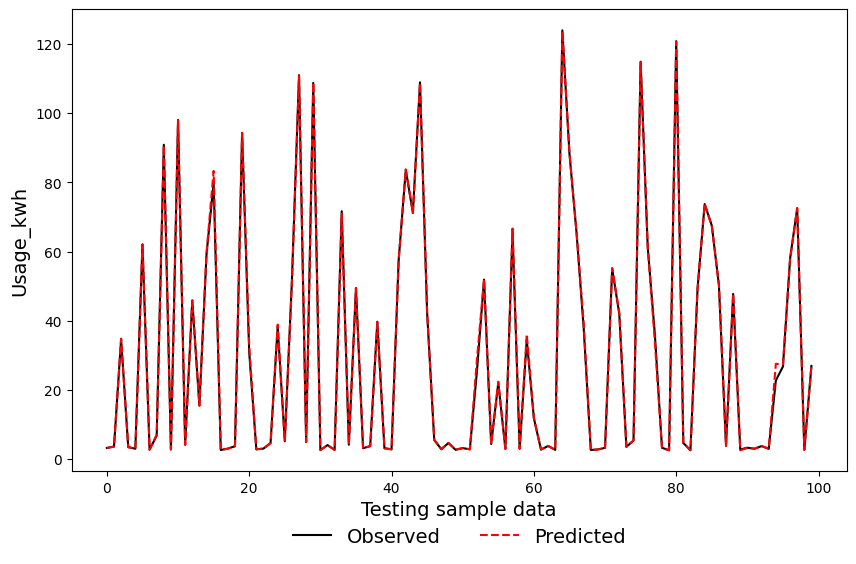

In [ ]:
N  = range(len(X_test[:100]))
plt.plot(N,y_test[:100],label='Observed',color='k',linestyle='-')
plt.plot(N,predictions3[:100],label='Predicted',color='r',linestyle='--')
plt.ylabel('Usage_kwh')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc = 'lower center', ncol = 2, frameon = False)

Dapat dilihat bahwa model baseline ini dapat memprediksi secara akurat seluruh sampel data testing

In [ ]:
y_pred_ann2 = model3.predict(X_test)
mse_ann, mae_ann = model3.evaluate(X_test, y_test)
r2_ann = r2_score(y_test, y_pred_ann2)
print('Mean squared error from neural net: ', mse_ann)
print('Mean absolute error from neural net: ', mae_ann)
print("ANN R-squared Score:", r2_ann)

219/219 [==============================] - 1s 2ms/step - loss: 0.3297 - mae: 0.1841
Mean squared error from neural net:  0.3297436833381653
Mean absolute error from neural net:  0.1840783804655075
ANN R-squared Score: 0.999712542296317


Dapat dilihat bahwa hasil MSE, MAE, dan R2 dari model baseline ANN ini sangat baik.

Model 4

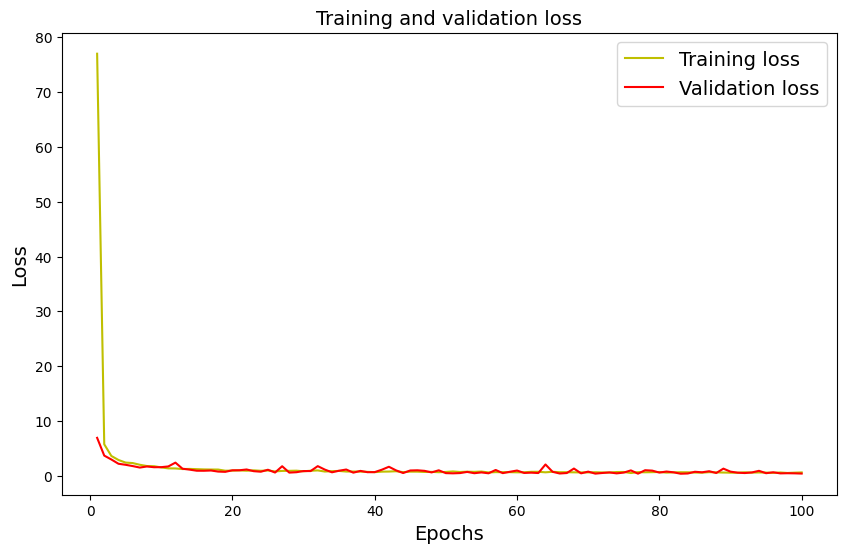

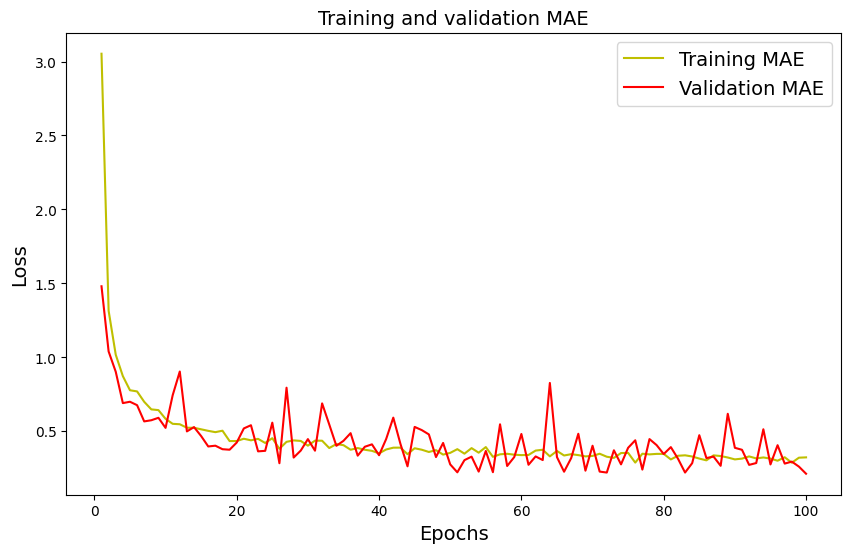

In [ ]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history4.history['mae']
val_acc = history4.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Dapat dilihat dari graf diatas bahwa performa model terus membaik seiring bertambahnya epoch, dan model ini telah mengalami Convergence, dimana model telah belajar sebanyak mungkin dari data training dan telah mencapai performa terbaik.

In [ ]:
#Predict on test data
predictions4 = model4.predict(X_test)
print("Predicted values are: ", predictions4[:5])
print("Real values are: ", y_test[:5])


219/219 [==============================] - 1s 3ms/step
Predicted values are:  [[ 3.2863028]
 [ 3.757738 ]
 [34.416992 ]
 [ 3.447817 ]
 [ 3.0212462]]
Real values are:  29401     3.24
31099     3.64
20097    34.70
32182     3.46
16525     3.02
Name: Usage_kWh, dtype: float64


Dapat dilihat dengan inputan yang sama, hasil prediksi dengan nilai sebenarnya tidak memiliki perbedaan nilai yang signifikan


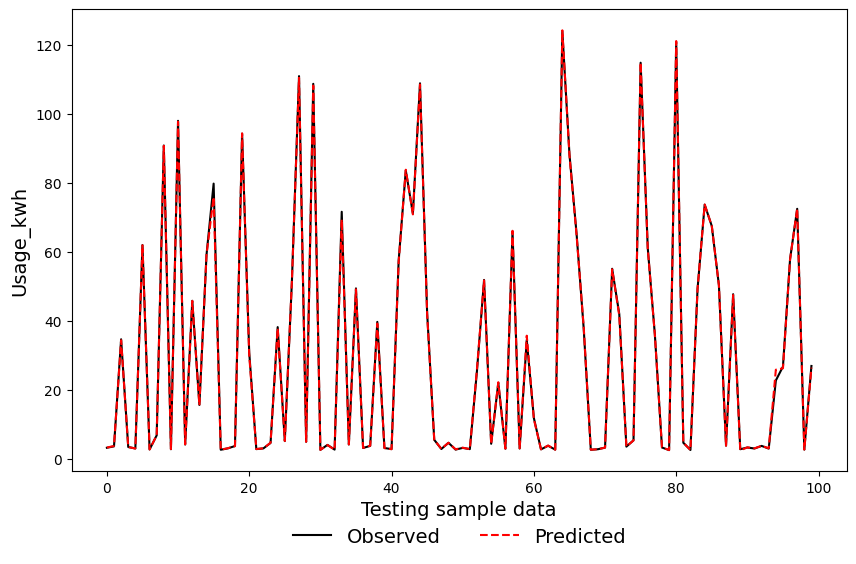

In [ ]:
N  = range(len(X_test[:100]))
plt.plot(N,y_test[:100],label='Observed',color='k',linestyle='-')
plt.plot(N,predictions4[:100],label='Predicted',color='r',linestyle='--')
plt.ylabel('Usage_kwh')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor=(0.5,-0.2), loc = 'lower center', ncol = 2, frameon = False)

Dapat dilihat bahwa model baseline ini dapat memprediksi secara akurat seluruh sampel data testing

In [ ]:
y_pred_ann2 = model4.predict(X_test)
mse_ann, mae_ann = model4.evaluate(X_test, y_test)
r2_ann = r2_score(y_test, y_pred_ann2)
print('Mean squared error from neural net: ', mse_ann)
print('Mean absolute error from neural net: ', mae_ann)
print("ANN R-squared Score:", r2_ann)

219/219 [==============================] - 0s 2ms/step - loss: 0.4039 - mae: 0.2114
Mean squared error from neural net:  0.4038583040237427
Mean absolute error from neural net:  0.21137546002864838
ANN R-squared Score: 0.9996479320874896


Dapat dilihat bahwa hasil MSE, MAE, dan R2 dari model baseline ANN ini sangat baik.

# Kesimpulan
Dari perbandingan beberapa ANN dengan variasi jumlah neuron, dan fungsi aktivasi, model-model tersebut digunakan untuk membandingkan akurasi dan performa relatif terhadap baseline model, dan juga berbagai fungsi aktivasi seperti reLU dan sigmoid pada input dan hidden layer. Ini mempengaruhi cara model memproses informasi. Model mengalami peningkatan performa seiring dengan jumlah epoch(iterasi) yang bertambah. Namun, beberapa model memiliki loss yang tinggi, meskipun telah mencapai "convergencce" yang menandakan bahwa mereka telah mempelajari sebanyak mungkin dari data training. Untuk kinerja prediksi terdapat perbedaan signifikan dalam prediksi tergantung pada konfigurasi model, dimana model dengan jumlah neuron yang sangat kecil cenderung memberikan prediksi yang buruk. Metrik evaluasi seperti Mean Squad Error(MSE), Mean Absolute Error(MAE), dan R2 Score digunakan untuk menilai kualitas prediksi model. Baseline model mendapatkan hasil yang sangat baik untuk matrik evaluasi tersebut menunjukkan kualitas prediksi yang tinggi.

Dari dataset Steel Industry Energy Consumption, hasil yang terbaik didapatkan dari model 3 dengan cara menggunakan fungsi aktivasi sigmoid, memiliki 3 layer yaitu input dengan 128 neuron, hidden dengan 64 neuron dan output dengan 1 neuron.